In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
from wordcloud import WordCloud

## NLP Analysis on Amenities

In [2]:
data = pd.read_csv("train.csv")

In [3]:
Amen = pd.DataFrame(data['amenities'])
Amen.head()

,amenities
0,"{""Wireless Internet"",""Air conditioning"",Kitche..."
1,"{""Wireless Internet"",""Air conditioning"",Kitche..."
2,"{TV,""Cable TV"",""Wireless Internet"",""Air condit..."
3,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
4,"{TV,Internet,""Wireless Internet"",""Air conditio..."


In [4]:
#remove the signs
Amen["amenities"] = Amen["amenities"].str.replace("{", "")
Amen["amenities"] = Amen["amenities"].str.replace("}", "")
Amen["amenities"] = Amen["amenities"].str.replace("\"", "")

In [5]:
#turn the description to list by splitting them using ","
Amen["amenities"] = Amen["amenities"].str.split(pat = ",")

In [6]:
Amen.head()

,amenities
0,"[Wireless Internet, Air conditioning, Kitchen,..."
1,"[Wireless Internet, Air conditioning, Kitchen,..."
2,"[TV, Cable TV, Wireless Internet, Air conditio..."
3,"[TV, Cable TV, Internet, Wireless Internet, Ki..."
4,"[TV, Internet, Wireless Internet, Air conditio..."


In [7]:
#Vectorize the item in the list by count
from sklearn.feature_extraction.text import CountVectorizer
inp = ["<some_space>".join(x) for x in Amen["amenities"]]
vectorizer = CountVectorizer(tokenizer = lambda x: x.split("<some_space>"), analyzer="word")

vector = vectorizer.fit_transform(inp)

In [8]:
print(vectorizer.get_feature_names())

['', ' smooth pathway to front door', '24-hour check-in', 'accessible-height bed', 'accessible-height toilet', 'air conditioning', 'air purifier', 'baby bath', 'baby monitor', 'babysitter recommendations', 'bath towel', 'bathtub', 'bathtub with shower chair', 'bbq grill', 'beach essentials', 'beachfront', 'bed linens', 'body soap', 'breakfast', 'buzzer/wireless intercom', 'cable tv', 'carbon monoxide detector', 'cat(s)', 'changing table', 'children’s books and toys', 'children’s dinnerware', 'cleaning before checkout', 'coffee maker', 'cooking basics', 'crib', 'disabled parking spot', 'dishes and silverware', 'dishwasher', 'dog(s)', 'doorman', 'doorman entry', 'dryer', 'elevator', 'elevator in building', 'essentials', 'ethernet connection', 'ev charger', 'extra pillows and blankets', 'family/kid friendly', 'fire extinguisher', 'fireplace guards', 'firm matress', 'firm mattress', 'first aid kit', 'fixed grab bars for shower & toilet', 'flat', 'flat smooth pathway to front door', 'free p

In [9]:
Amen_df = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names())
Amen_df.head()

,,smooth pathway to front door,24-hour check-in,accessible-height bed,accessible-height toilet,air conditioning,air purifier,baby bath,baby monitor,babysitter recommendations,...,well-lit path to entrance,wheelchair accessible,wide clearance to bed,wide clearance to shower & toilet,wide clearance to shower and toilet,wide doorway,wide entryway,wide hallway clearance,window guards,wireless internet
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
count_list = vector.toarray().sum(axis=0)
amen_dict = dict(zip(vectorizer.get_feature_names(),count_list))
del amen_dict[''] #remove empty value
amen_dict

{' smooth pathway to front door': 397,
 '24-hour check-in': 19015,
 'accessible-height bed': 349,
 'accessible-height toilet': 261,
 'air conditioning': 55210,
 'air purifier': 14,
 'baby bath': 305,
 'baby monitor': 133,
 'babysitter recommendations': 677,
 'bath towel': 1,
 'bathtub': 3761,
 'bathtub with shower chair': 34,
 'bbq grill': 633,
 'beach essentials': 102,
 'beachfront': 33,
 'bed linens': 4178,
 'body soap': 1,
 'breakfast': 8306,
 'buzzer/wireless intercom': 17033,
 'cable tv': 24253,
 'carbon monoxide detector': 47190,
 'cat(s)': 3593,
 'changing table': 225,
 'children’s books and toys': 1126,
 'children’s dinnerware': 635,
 'cleaning before checkout': 271,
 'coffee maker': 3555,
 'cooking basics': 3958,
 'crib': 442,
 'disabled parking spot': 34,
 'dishes and silverware': 4255,
 'dishwasher': 2312,
 'dog(s)': 5255,
 'doorman': 4780,
 'doorman entry': 453,
 'dryer': 42711,
 'elevator': 10820,
 'elevator in building': 6417,
 'essentials': 64005,
 'ethernet connection':

In [15]:
sorted(amen_dict.items(), key=lambda x: x[1])


[('bath towel', 1),
 ('body soap', 1),
 ('hand or paper towel', 1),
 ('hand soap', 1),
 ('toilet paper', 1),
 ('wide clearance to shower and toilet', 1),
 ('grab-rails for shower and toilet', 2),
 ('roll-in shower with chair', 3),
 ('paid parking off premises', 7),
 ('flat smooth pathway to front door', 11),
 ('ski in/ski out', 13),
 ('air purifier', 14),
 ('firm matress', 15),
 ('lake access', 18),
 ('ground floor access', 25),
 ('path to entrance lit at night', 27),
 ('washer / dryer', 31),
 ('beachfront', 33),
 ('bathtub with shower chair', 34),
 ('disabled parking spot', 34),
 ('ev charger', 49),
 ('fixed grab bars for shower & toilet', 68),
 ('private bathroom', 74),
 ('free parking on street', 77),
 ('table corner guards', 88),
 ('beach essentials', 102),
 ('firm mattress', 115),
 ('waterfront', 115),
 ('wide clearance to shower & toilet', 123),
 ('baby monitor', 133),
 ('handheld shower head', 136),
 ('hot water kettle', 173),
 ('pocket wifi', 217),
 ('other', 218),
 ('fireplace

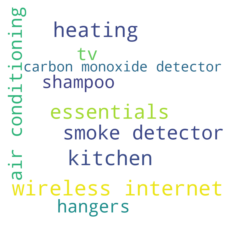

In [16]:
#generate word cloud


wc = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(amen_dict)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()